Now that the data is cleaned up and we have an initial model, we can build a better one by adding more features and testing other model options to examine their fit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
league_df = pd.read_csv('league_cleaned.csv')
league_df.head()

,blue_win,blueGold,blueMinionsKilled,blueJungleMin,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueTowersDestroyed,redChampKills,redHeraldKills,redTowersDestroyed,blueGold_Diff,winner,blueChamp_Kills_Diff
0,0,24575.0,349.0,89.0,8.6,25856.0,346.0,80.0,9.2,6.0,1.0,1.0,12.0,2.0,1.0,-1281.0,Red,-6.0
1,0,27210.0,290.0,36.0,9.0,28765.0,294.0,92.0,9.4,20.0,0.0,0.0,19.0,2.0,0.0,-1555.0,Red,1.0
2,1,32048.0,346.0,92.0,9.4,25305.0,293.0,84.0,9.4,17.0,3.0,0.0,11.0,0.0,4.0,6743.0,Blue,6.0
3,0,20261.0,223.0,60.0,8.2,30429.0,356.0,107.0,9.4,7.0,0.0,3.0,16.0,3.0,0.0,-10168.0,Red,-9.0
4,1,30217.0,376.0,110.0,9.8,23889.0,334.0,60.0,8.8,16.0,3.0,0.0,8.0,0.0,2.0,6328.0,Blue,8.0


In [3]:
features = league_df.drop(columns=['winner']).iloc[:, 1:]
target = league_df['blue_win']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Now that we have split into train and test we're going to use cross validation

In [5]:
log_reg = LogisticRegression()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
scaler = StandardScaler()

In [6]:
c_range = list(range(1, 101))
log_params = dict(C=c_range)
depths = list(range(1, 11))
tree_params = dict(max_depth=depths)

In [7]:
X_scaled = scaler.fit_transform(X_train)
X_tr = scaler.transform(X_train.values)

In [8]:
log_grid = GridSearchCV(log_reg, log_params, cv=5, scoring='f1')
log_grid.fit(X_tr, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...]},
             scoring='f1')

In [9]:
print(log_grid.best_score_)
print(log_grid.best_params_)
print(log_grid.best_estimator_)

0.7870889965254161
{'C': 2}
LogisticRegression(C=2)


In [10]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='f1')
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1')

In [11]:
print(tree_grid.best_score_)
print(tree_grid.best_params_)
print(tree_grid.best_estimator_)

0.7877078791176397
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)


In [13]:
tree_grid.best_score_

0.7877078791176397

In [14]:
f1_score(y_train, tree_grid.predict(X_train))

0.7875593565870272

In [98]:
tree_confuse = confusion_matrix(y_train, tree_grid.predict(X_train))

In [17]:
f1_score(y_train, log_grid.predict(X_tr))

0.7874059910771192

In [116]:
log_train_confuse = confusion_matrix(y_train, log_grid.predict(X_tr))

In [19]:
log_grid.score(X_tr, y_train)

0.7874059910771192

In [20]:
tree_grid.score(X_train, y_train)

0.7875593565870272

Based on this, the Regression Tree performs marginally better than the logistic regression model, so I'm going to use the regression model for its interpretability.

In [21]:
X_test_scaled = scaler.transform(X_test.values)

In [22]:
log_reg.fit(X_test_scaled, y_test)

LogisticRegression(C=2)

In [23]:
f1_score(y_test, log_reg.predict(X_test_scaled))

0.8006814310051107

In [114]:
log_reg_confuse = confusion_matrix(y_test, log_reg.predict(X_test_scaled))

In [25]:
log_reg.intercept_

array([0.07432249])

In [113]:
log_reg.score(X_test_scaled, y_test)

0.7956016853355257

In [52]:
log_reg.coef_
coefficients = [ 0.62525814,  0.01158361,  0.05427513,  0.16869513, -0.35426446,
        -0.10155253, -0.07487925, -0.25719062,  0.03126979,  0.14963612,
        -0.01329318, -0.18089124, -0.22247075, -0.10012086,  0.57503971,
         0.14550475]

In [67]:
# label = X_test.columns.copy()
label = ['blueGold', 'blueMinionsKilled', 'blueJungleMin', 'blueAvgLevel',
       'redGold', 'redMinionsKilled', 'redJungleMinionsKilled', 'redAvgLevel',
       'blueChampKills', 'blueHeraldKills', 'blueTowersDestroyed',
       'redChampKills', 'redHeraldKills', 'redTowersDestroyed',
       'blueGold_Diff', 'blueChamp_Kills_Diff']

In [68]:
dataset = pd.DataFrame({'label': label, 'coefficients': coefficients}, columns=['label', 'coefficients'])

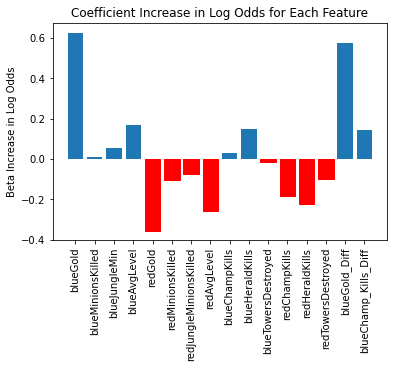

In [105]:
coef_fig = plt.bar(x=dataset['label'], height=dataset['coefficients'])
plt.xticks(rotation=90)
plt.ylabel('Beta Increase in Log Odds')
plt.title('Coefficient Increase in Log Odds for Each Feature')
plt.ticklabel_format(axis='y', style='plain')
coef_fig[4].set_color('r')
coef_fig[5].set_color('r')
coef_fig[6].set_color('r')
coef_fig[7].set_color('r')
coef_fig[10].set_color('r')
coef_fig[11].set_color('r')
coef_fig[12].set_color('r')
coef_fig[13].set_color('r')
plt.savefig('figures/coefficients.svg', bbox_inches = 'tight')
plt.savefig('figures/coefficients.png', bbox_inches = 'tight')

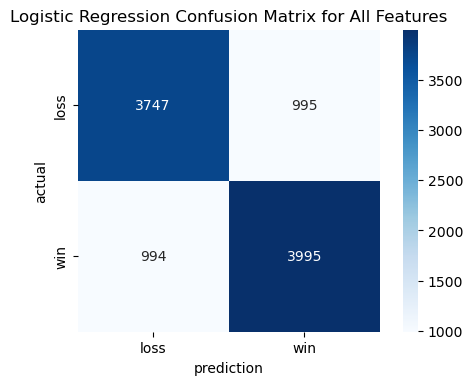

In [115]:
plt.figure(dpi=100);
sns.heatmap(log_reg_confuse, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['loss', 'win'],
           yticklabels=['loss', 'win']);
plt.xlabel('prediction');
plt.ylabel('actual');
plt.title('Logistic Regression Confusion Matrix for All Features');
plt.savefig('figures/final_log_reg_confusion_matrix.svg', bbox_inches = 'tight')
plt.savefig('figures/final_log_reg_confusion_matrix.png', bbox_inches = 'tight')

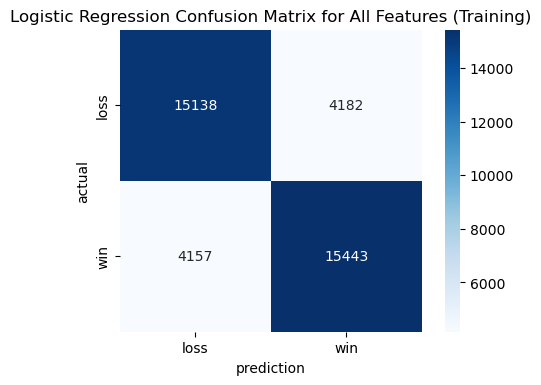

In [117]:
plt.figure(dpi=100);
sns.heatmap(log_train_confuse, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['loss', 'win'],
           yticklabels=['loss', 'win']);
plt.xlabel('prediction');
plt.ylabel('actual');
plt.title('Logistic Regression Confusion Matrix for All Features (Training)');
plt.savefig('figures/log_reg_confusion_matrix_train.svg', bbox_inches = 'tight')
plt.savefig('figures/log_reg_confusion_matrix_train.png', bbox_inches = 'tight')

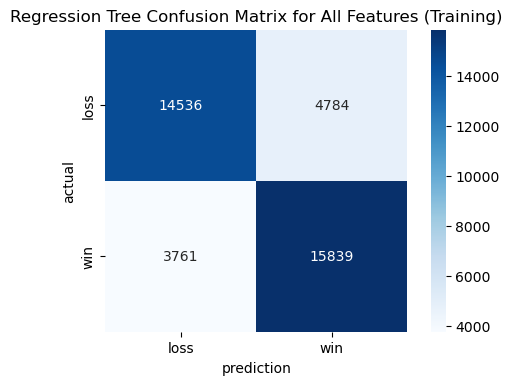

In [108]:
plt.figure(dpi=100);
sns.heatmap(tree_confuse, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['loss', 'win'],
           yticklabels=['loss', 'win']);
plt.xlabel('prediction');
plt.ylabel('actual');
plt.title('Regression Tree Confusion Matrix for All Features (Training)');
plt.savefig('figures/tree_confusion_matrix_train.svg', bbox_inches = 'tight')
plt.savefig('figures/tree_confusion_matrix_train.png', bbox_inches = 'tight')